### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Ejercicios básicos

#### Generar una lista de valores de una distribución normal e identificar las posiciones donde los valores son superiores a 1.5 desviaciones típicas y los que no.

In [2]:
normal = np.random.normal(size = 100)
dt = np.std(normal)
dt15 = dt * 1.5
gt15 = normal > dt15
trues = normal[gt15]

#### Dibujar la distribución eliminando los datos seleccionados superpuesta a la original.

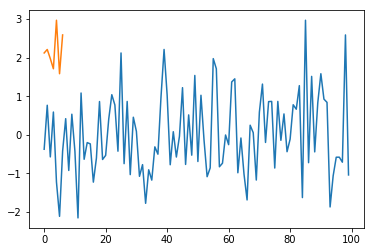

In [3]:
plt.plot(normal)
plt.plot(trues)

#### Comparar la curtosis de las dos distribuciones siguiendo el criterio de Pearson.

In [4]:
kn = np.corrcoef(normal)
kt = np.corrcoef(trues)

kn, kt

(1.0, 1.0)

### 2. Muestra de datos de Exchange de Bitcoin

#### Trabajaremos ahora con cotizaciones de Bitcoin que pueden encontrarse aquí: https://www.kaggle.com/mczielinski/bitcoin-historical-data/data. Primero cargaremos los datos del primero de los ficheros, tomando las columnas "Close", "High" y "Low".

In [5]:
data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv")
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
close = data.Close.values
low = data.Low.values
high = data.High.values

#### Dibujar la secuencia de valores de cotización para todo el periodo y para una parte de 30 días consecutivos (tomar cualquier slice).

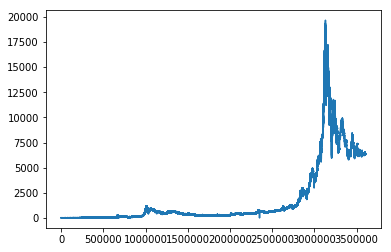

In [7]:
plt.plot(close)

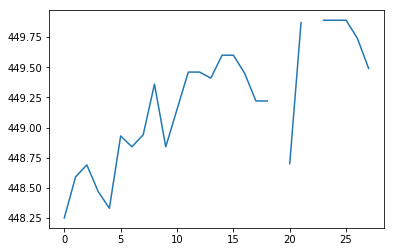

In [8]:
np.random.seed(2930)
rnd = np.random.randint(1, len(close)-30, 1)
rnd30 = np.arange(rnd, rnd + 30)

close30 = close[np.array(rnd30)]
plt.plot(close30)

#### Identificar gráficamente en qué partes del intervalo hay una diferencia entre los valores high y low.

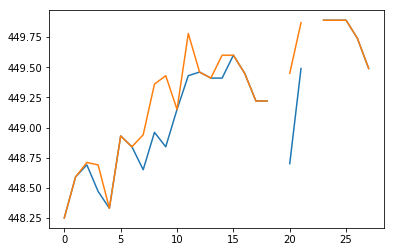

In [9]:
low30 = low[np.array(rnd30)]
high30 = high[np.array(rnd30)]

plt.plot(low30)
plt.plot(high30)

#### Cambiar por un valor nulo los valores que no difieren entre high y low y dibujarlos utilizando scatter() (dibujar solo los por ejemplo, 10000 últimos puntos de la serie, y utilizar transparencia en los puntos para visualizarlo mejor).

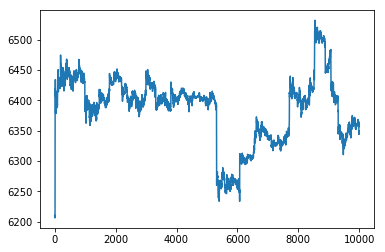

In [10]:
highlow = high - low
trues = highlow == 0
equals = high[highlow == 0]
last10000 = equals[-10000:]
plt.plot(last10000)

#### Determinar en qué porcentaje de los días hay una variación entre high y low.

In [11]:
eq = trues.sum()
ne = len(trues) - eq
diffPerc = ne / len(trues) * 100
print(diffPerc)

81.30062256878453


#### Dibujar los datos donde el valor más alto del día de Bitcoin está entre 500 y 2000 dólares.

In [12]:
# btw = high > 500 & high < 2000
# TypeError: ufunc 'bitwise_and' not supported for the input types, and the
# inputs could not be safely coerced to any supported types according to the 
# casting rule ''safe''
# work around does not work either
# highInt = np.array(high, dtype='uint32')
# btw = highInt > 500 & highInt < 2000
# ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### Identificar la posición y el valor del menor y el mayor valor de low.

In [13]:
minimum = np.nanmin(low)
minimumIdx = np.nanargmin(low)

maximum = np.nanmax(low)
maximumIdx = np.nanargmax(low)

minimum, minimumIdx, maximum, maximumIdx

(1.5, 2349652, 19649.96, 3130120)

#### Dibujar solo los puntos en los que el valor desde el día anterior ha cambiado en más de 10 dólares para el valor low.

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


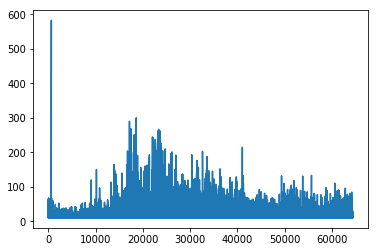

In [14]:
diff = np.diff(low)
diff10 = diff[diff > 10]
plt.plot(diff10)